# Estatística - Probabilidade e Amostragem Desafio Final



> Nome: Ana Luisa Fuchs da Silveira



Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).

Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Abertura do arquivo csv
df = pd.read_csv('challenge_populacao_brasileira.csv')

### 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [ ]:
df.head(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


In [ ]:
#Alteração do nome da coluna na tabela a nível de facilitação de manipulação
nome_ingles = {'nível de proficiência em inglês' : 'ingles'}

df.rename(columns=nome_ingles, inplace=True)

In [ ]:
df['ingles'].value_counts()
#Existem 344 pessoas fluentes em inglês

Avançado         344
Intermediário    329
Básico           327
Name: ingles, dtype: int64

In [ ]:
df.ingles.describe()
#Existem 1000 pessoas no total

count         1000
unique           3
top       Avançado
freq           344
Name: ingles, dtype: object

In [ ]:
#P(A c) = 1 − P(A): A probabilidade de um evento A complementar é 1 - P(A)
#P(A) = 344 fluentes / 1000 total

PAc = 1 - (344/1000)

print(f'A probabilidade de um evento complementar de escolher pessoas fluentes em inglês é de {PAc * 100:.2f}%')

A probabilidade de um evento complementar de escolher pessoas fluentes em inglês é de 65.60%


### 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [ ]:
#Quantas pessoas existem no meu espaço amostral (Pessoa ser do Alagoas ou Pará)

df_filtered = df.loc[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

In [ ]:
espaco_amostral_ALPR = df_filtered.count()[0]

print(f'O espaço amostral (pessoas do Alagoas ou Pará) é de {espaco_amostral_ALPR} pessoas.')

O espaço amostral (pessoas do Alagoas ou Pará) é de 79 pessoas.


In [ ]:
#Probabilidade de possuir renda acima de 5k no meu espaço amostral:

renda_acima_5k = df_filtered[df_filtered['renda'] > 5000].count()[0]

print(f'Pessoas do espaço amostral que possuem renda acima de 5 mil são de {renda_acima_5k} pessoas.')

Pessoas do espaço amostral que possuem renda acima de 5 mil são de 4 pessoas.


In [ ]:
#Probabilidade de pessoas do AL ou PR possuir renda acima de 5K:

print('A probabilidade de existir uma pessoa Alagoense ou Paraense com renda acima de 5k \n',
      f'é de {renda_acima_5k / espaco_amostral_ALPR * 100 :.2f}%')

A probabilidade de existir uma pessoa Alagoense ou Paraense com renda acima de 5k 
 é de 5.06%


### 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,ingles,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
#Espaço amostral = pessoas amazonenses

df_amazonense = df.loc[df['estado'] == 'AM']

In [ ]:
#Quantas pessoas existem no meu espaço amostral?
print(f'Existem {df_amazonense.count()[0]} pessoas amazonenses no meu dataframe')

Existem 38 pessoas amazonenses no meu dataframe


In [ ]:
#Verificando quais tipos de escolaridade existem no dataframe
df['escolaridade'].value_counts()

Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: escolaridade, dtype: int64

In [ ]:
#Quantas pessoas possuiem ensino superior completo sendo amazonenses, na amostra:

superior_completo_amazonense = df_amazonense.loc[(df_amazonense['escolaridade'] == 'Superior') | (df_amazonense['escolaridade'] == 'Pós-graduação')].count()[0]

print(f'Existem {superior_completo_amazonense} pessoas amazonenses no meu dataframe que possuem ensino superior completo')

Existem 21 pessoas amazonenses no meu dataframe que possuem ensino superior completo


In [ ]:
#Probabilidade de pessoas com ensino superior dentro da amostragem de população amazonense:

PEnsinoSuperior = superior_completo_amazonense / df_amazonense.count()[0]

print(f'Probabilidade de pessoas com ensino superior dentro da amostragem de população amazonense é de {PEnsinoSuperior * 100 :.2f}%')

Probabilidade de pessoas com ensino superior dentro da amostragem de população amazonense é de 55.26%


Para descobrir a probabilidade da QUINTA pessoa ser selecionada, essa pessoa deve possuir a probabilidade PEnsinoSuperior e as pessoas 01, 02, 03 e 04 podem não possuir ensino superior, podendo ser a Probabilidade Complementar


Probabilidade de ter a quinta pessoa com ensino superior completo:

Probabilidade da Pessoa 1 (P1) * P2 * P3 * P4 * P5, sendo a P5 == Probabilidade de Ensino superior

Sendo P1, P2, P3, P4 = Probabilidade Complementar (não possuindo ensino superior).

Assim:

In [ ]:
#P Complementar de Ensino Superior Completo Amazonense:

PCA = 1 - PEnsinoSuperior

#4 pessoas sem ensino superior * Probabilidade de possuir Ensino Superior
print(f'A probabilidade da quinta pessoa amazonense possuir Ensino Superior é de { PCA ** 4  * PEnsinoSuperior * 100:.2f}%')

A probabilidade da quinta pessoa amazonense possuir Ensino Superior é de 2.21%


### 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,ingles,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
#Verificação dos valores existentes, sua média, mediana, quartis.
df.renda.describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [ ]:
# Defina os parâmetros da distribuição normal (média e desvio padrão)
media = df.renda.mean()  # Média dos salários
desvio_padrao = df.renda.std()  # Desvio padrão dos salários

# Gere os dados de salários
salarios = np.arange(0, int(df['renda'].max() + 1500), 1500)  # Bins de 1500 em 1500

# Calcule a PDF para cada bin de salário
pdf = stats.norm.pdf(salarios, media, desvio_padrao)

# Os valores de 'pdf' agora contêm a função de densidade de probabilidade para cada bin de salário

for i in range(len(salarios)):
  print(f'No intervalo de salário {salarios[i]} temos a função de densidade de probabilidade {pdf[i]}')

No intervalo de salário 0 temos a função de densidade de probabilidade 3.348437176437823e-06
No intervalo de salário 1500 temos a função de densidade de probabilidade 0.0001134553678091081
No intervalo de salário 3000 temos a função de densidade de probabilidade 0.00039894386980416654
No intervalo de salário 4500 temos a função de densidade de probabilidade 0.00014558022928379646
No intervalo de salário 6000 temos a função de densidade de probabilidade 5.513112528922375e-06


In [ ]:
faixa_salarial = range(0, int(df['renda'].max() + 1500), 1500)

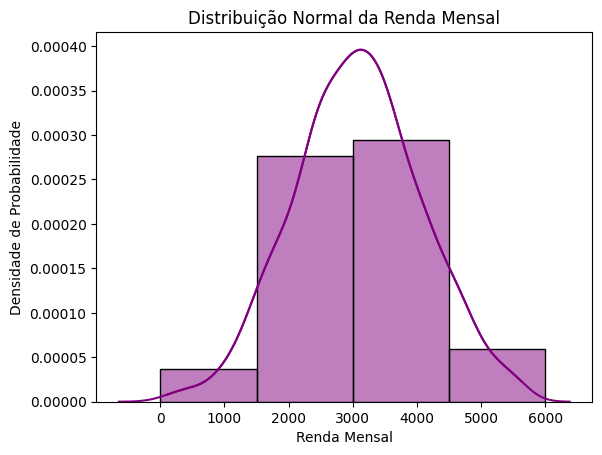

In [ ]:
# Plotar o gráfico de distribuição normal com função densidade de probabilidade
sns.histplot(data=df, x='renda', bins=faixa_salarial, kde=True, stat='density', color='purple')

# Plotar a função densidade de probabilidade
sns.kdeplot(data=df, x='renda', color='purple')

# Adicionar rótulos e título
plt.xlabel('Renda Mensal')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal da Renda Mensal')

# Exibir o gráfico
plt.show()

Observando o gráfico, é possível perceber que a maior concentração está entre 1500 a 4500 reais, indicando que a maioria encontra-se acima de 1500 na faixa salarial.

### 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


In [ ]:
df.renda.describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [ ]:
def describe_new(df):
    df1 = df.renda.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

    #Função aprendida em aula para adicionar amplitude e variância no describe()

In [ ]:
df_renda = describe_new(df)

In [ ]:
df_renda

count          1000.000000
mean           3082.537180
std             996.572239
min             103.740000
25%            2425.815000
50%            3076.415000
75%            3714.487500
max            5632.380000
amplitude      5528.640000
variancia    993156.228168
Name: renda, dtype: float64

In [ ]:
df_renda.loc[['mean', 'variancia']]

mean           3082.537180
variancia    993156.228168
Name: renda, dtype: float64

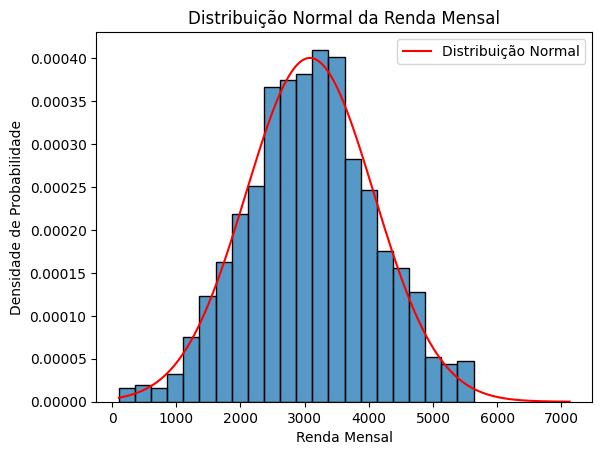

In [ ]:
# Plotar o histograma da renda mensal sem bins especificados
sns.histplot(data=df, x='renda', kde=False, stat='density')

# Calcular média e desvio padrão dos dados de renda mensal
media = df_renda.loc['mean']
desvio_padrao = df_renda.loc['std']


# Plotar a distribuição normal
x = np.linspace(df['renda'].min(), int(df['renda'].max() + 1500), 1000)
pdf = stats.norm.pdf(x, media, desvio_padrao)
plt.plot(x, pdf, color='red', label='Distribuição Normal')


# Adicionar rótulos e título
plt.xlabel('Renda Mensal')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal da Renda Mensal')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

### 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
#Probabilidade de encontrar, na amostra, pessoas com escolaridade de pós graduação.

df['escolaridade'].isin(['Pós-graduação']).value_counts()

False    747
True     253
Name: escolaridade, dtype: int64

In [ ]:
#Ou:
df.escolaridade.value_counts()

Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: escolaridade, dtype: int64

In [ ]:
#Probabilidade = Evento desejado / Espaço Amostral

probPosGrad = 253 / 1000
probPosGrad

0.253

Sabendo que a probabilidade de se encontrar alguém com pós graduação nos registros é de 0.253, elevando isso para os habitantes, é ideal realizar uma distribuição, de maneira binomial, para possuir 243 mil sucessos e o excedente sendo fracasso.

In [ ]:
#Considerando 1 milhão de habitantes:
#Sucesso = 243 mil

from scipy.stats import binom

# Parâmetros
n = 1000000        # tamanho da população (um milhão)
k = 243000         # número de sucessos desejado
p = probPosGrad    # probabilidade de sucesso


prob_total = binom.pmf(k, n, p)

In [ ]:
print(f"A probabilidade de encontrar 243 mil pessoas com pós-graduação é: {prob_total}")

A probabilidade de encontrar 243 mil pessoas com pós-graduação é: 1.1104854289794913e-119


### 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
#Organizando o dataframe apenas nos necessários: escolaridade e o somatório de indivíduos.
df_frequencia = df[['Unnamed: 0', 'escolaridade']].groupby('escolaridade').sum()

nome = {'Unnamed: 0' : 'somatorio'}
df_frequencia.rename(columns=nome, inplace=True)

In [ ]:
df_frequencia

,somatorio
escolaridade,
Fundamental,131341
Médio,119181
Pós-graduação,122845
Superior,126133


In [ ]:
# Calcular a frequência relativa
df_frequencia['Frequencia_Relativa'] = df_frequencia['somatorio'] / df_frequencia.sum()[0]

In [ ]:
# Ordenar as categorias de escolaridade
df_frequencia.sort_values(by='somatorio', inplace=True)

In [ ]:
# Calcular a função de densidade acumulada (CDF)
df_frequencia['Densidade_Acumulada'] = df_frequencia['Frequencia_Relativa'].cumsum()

In [ ]:
df_frequencia

,somatorio,Frequencia_Relativa,Densidade_Acumulada
escolaridade,,,
Médio,119181,0.238601,0.238601
Pós-graduação,122845,0.245936,0.484537
Superior,126133,0.252519,0.737055
Fundamental,131341,0.262945,1.000000


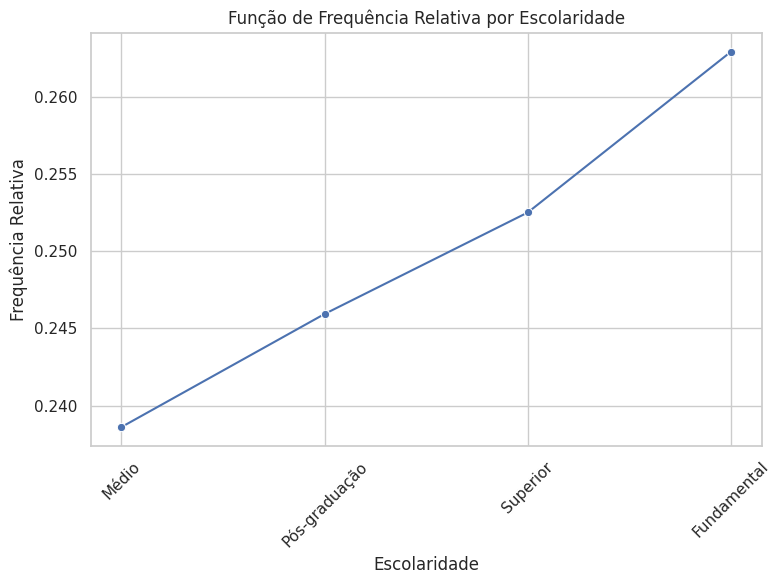

In [ ]:
# Definir estilo seaborn
sns.set(style="whitegrid")

# Plotar a função de densidade acumulada
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_frequencia, x='escolaridade', y='Frequencia_Relativa', marker='o')

# Adicionar rótulos e título
plt.xlabel('Escolaridade')
plt.ylabel('Frequência Relativa')
plt.title('Função de Frequência Relativa por Escolaridade')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


*  Amostra: toda a população (df)
* Proporção de pessoas com nível de inglês intermediário (nr pessoas ingles intermed / pop total)
* valor de confiança = 0.95
* calcular o z dada a confiança da amostra definida
* calcular a margem de erro a partir da seguinte fórmula:

Fórmula:
```
Z * np.sqrt((p * (1 - p)) / n)
```



Valor tabelado de Z = -1,96 e + 1,96 para 95% de confiança

In [ ]:
#Calculo de Z
z = ( df['Unnamed: 0'].max() - df['Unnamed: 0'].mean() ) / df['Unnamed: 0'].std()

print(f'O Z calculado possui o seguinte valor: {z:.1f}')  #1.7, aproximado do valor tabelado

O Z calculado possui o seguinte valor: 1.7


In [ ]:
df.ingles.isin(['Intermediário']).value_counts()

False    671
True     329
Name: ingles, dtype: int64

In [ ]:
prop_ingles_intermed = 329 / 1000

In [ ]:
intervalo_confianca_mais = 1.96 * np.sqrt((prop_ingles_intermed * (1 - prop_ingles_intermed)) / df.ingles.count())

In [ ]:
intervalo_confianca_menos = - 1.96 * np.sqrt((prop_ingles_intermed * (1 - prop_ingles_intermed)) / df.ingles.count())

In [ ]:
print(f'A margem de erro amostral da proporção populacional \n',
      'considerando a proporção de pessoas com nível de inglês intermediário \n',
      f'é entre {intervalo_confianca_menos :.2f} e {intervalo_confianca_mais :.2f}')

A margem de erro amostral da proporção populacional 
 considerando a proporção de pessoas com nível de inglês intermediário 
 é entre -0.03 e 0.03


### 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?


k = 60 pessoas


In [ ]:
df.where(df.renda > df.renda.mean() + 1000).count()

Unnamed: 0      161
estado          161
idade           161
escolaridade    161
ingles          161
renda           161
sexo            161
dtype: int64

In [ ]:
prob_renda_1_pessoa = 161 / 1000
prob_renda_1_pessoa

0.161

In [ ]:
prob_renda_1_pessoa * 60

9.66

In [ ]:
binom.pmf(60, 1000, 0.161)

1.099520565163774e-22

In [ ]:
from scipy.stats import binom

# Parâmetros da distribuição binomial
n = 1000                # Número total de pessoas
p = prob_renda_1_pessoa
k = 60  # Probabilidade de uma pessoa ter renda acima da média

# Calcular a probabilidade de pelo menos 60 pessoas terem renda acima da média
prob_renda = binom.pmf(k, n, p)

print("A probabilidade de pelo menos 60 pessoas terem renda acima da média é:", prob_renda)

A probabilidade de pelo menos 60 pessoas terem renda acima da média é: 1.099520565163774e-22


### 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

- Amostra: população total
- Deve ser do sudeste: RJ, SP, MG e ES
- Deve possuir Sexo = M
- Escolaridade = Ensino Fundamental
- Renda > 2000

Probabilidade Sudeste * Probabilidade Homem * Prob Escolaridade * Prob Renda

In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,ingles,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
#Probabilidade de ser do Sudeste

prob_sudeste = df.estado.isin(['RJ', 'SP', 'MG', 'ES']).sum() / df.estado.count()
prob_sudeste

0.157

In [ ]:
#Probabilidade de ser Masculino
prob_masc = df.sexo.isin(['M']).sum() / df.sexo.count()
prob_masc

0.486

In [ ]:
#Probabilidade da Escolaridade ser igual ao Ensino Fundamental
prob_escol = df.escolaridade.isin(['Fundamental']).sum()  / df.escolaridade.count()
prob_escol

0.266

In [ ]:
#Probabilidade da Renda ser Maior que 2k
prob_renda = df.renda.where(df.renda > 2000).count() / df.renda.count()
prob_renda

0.858

In [ ]:
df_sudeste = df.loc[(df['estado'] == 'RJ') |(df['estado'] == 'SP') | (df['estado'] == 'MG') |(df['estado'] == 'ES')]

In [ ]:
prob_final = prob_sudeste * prob_masc * prob_escol * prob_renda
print('A probabilidade de escolhermos da população amostral um indivíduo do Sudeste que seja homem, \n',
       'com ensino fundamental e com renda maior que 2 mil reais por mês',
      f'é de {prob_final * 100:.2f}%')

A probabilidade de escolhermos da população amostral um indivíduo do Sudeste que seja homem, 
 com ensino fundamental e com renda maior que 2 mil reais por mês é de 1.74%
